<h2>DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARK FOUNDATION</h2>
<h4> Name : Kavya E.</h4>

<h3>TASK 2 - Prediction Using Unsupervised ML</h3>

We predict the optimum number of clusters from the given 'Iris' dataset and represent it visually.

In [1]:
#Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

<h3>Importing and reading the data</h3>

We load the data and read it, checking for missing values and duplicate values if any.

In [4]:
from sklearn import datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\datasets\base.py:240: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\datasets\base.py:244: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#display the shape of the dataset and the description
print(df.shape)

print(df.describe())

(150, 4)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
#check for duplicate and NULL values
df.duplicated().sum()
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<h3>Finding the optimum number of clusters for k-means classification</h3>

We find the number of clusters that is, the value of k using the 'elbow method'. The K-means clustering is performed for different values of K in the range 1 to 11.For each of the K values, we calculate average distances to the centroid across all data points.Then, we plot these points and find the point where the average distance from the centroid falls suddenly(Elbow).

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise

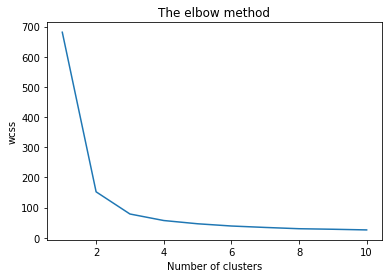

In [10]:
x = df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init=10, random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
    
#plotting   
import matplotlib.pyplot as plt    
plt.plot(range(1, 11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') 
plt.show()

The value of k is the point where, within the WCSS(cluster sum of squares) the graph doesn't decrease significantly with every iteration.
Hence the number of clusters is taken as 3.

<h3>Creating the K-means clusters</h3>

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\pairwise

<h3>Visualising the clusters</h3>


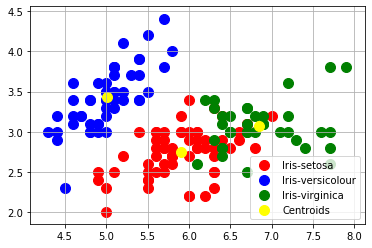

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid(True)
plt.legend()

The above graph displays the three clusters(that is, the three species of Iris). The yellow points represent the centroids of the three clusters.